In [1]:
from scripts.simulation_imports import *
from openai import OpenAI
import pandas as pd
import re
from ast import literal_eval
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from rank_bm25 import BM25Okapi

/home/aayush/reasoning_over_slaterecs/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
DATA_PATH = Path.home() / Path(os.environ.get("RSYS_DATA", "rsys_data/rsys_2025"))
gen_slates_dir = DATA_PATH / "gen_slates"

# Define file path
feather_file_path = gen_slates_dir / "wp_user_slates.feather"
feather_file_path1= gen_slates_dir / "wp_llm_slates_trial.feather"

In [ ]:
df = pd.read_feather(feather_file_path)


In [80]:
df=df.head(50)
df

,initial_user_state,candidate_docs,slate_docs
0,"[0.1973009705543518, 0.13024283945560455, -0.0...","[[-0.04699699580669403, -0.1554999053478241, 0...","[7, 38, 34, 50, 25, 18, 29, 12, 8, 36]"
1,"[0.1973009705543518, 0.13024283945560455, -0.0...","[[-0.04699699580669403, -0.1554999053478241, 0...","[7, 50, 38, 25, 34, 56, 47, 8, 54, 51]"
2,"[0.1973009705543518, 0.13024283945560455, -0.0...","[[-0.04699699580669403, -0.1554999053478241, 0...","[47, 48, 34, 44, 21, 15, 40, 1, 0, 54]"
3,"[0.1973009705543518, 0.13024283945560455, -0.0...","[[-0.04699699580669403, -0.1554999053478241, 0...","[47, 48, 34, 44, 21, 15, 40, 1, 0, 54]"
4,"[0.12371931970119476, 0.22699563205242157, -0....","[[0.12557996809482574, 0.09453339874744415, -0...","[35, 53, 57, 3, 17, 29, 48, 20, 49, 55]"
5,"[0.12371931970119476, 0.22699563205242157, -0....","[[0.12557996809482574, 0.09453339874744415, -0...","[35, 53, 3, 57, 43, 7, 48, 29, 17, 49]"
6,"[0.15689639747142792, 0.3857199251651764, 0.00...","[[0.21243348717689514, 0.21300996840000153, -0...","[5, 0, 6, 17, 16, 59, 28, 53, 14, 30]"
7,"[0.15689639747142792, 0.3857199251651764, 0.00...","[[0.21243348717689514, 0.21300996840000153, -0...","[59, 0, 6, 5, 24, 17, 53, 30, 14, 16]"
8,"[0.2417689859867096, 0.1665371209383011, -0.01...","[[0.4277783930301666, 0.005571569781750441, 0....","[25, 14, 6, 24, 0, 45, 44, 33, 19, 13]"
9,"[0.2417689859867096, 0.1665371209383011, -0.01...","[[0.4277783930301666, 0.005571569781750441, 0....","[0, 45, 14, 24, 33, 41, 50, 57, 16, 19]"


In [81]:
random_candidate_docs = df.loc[4, "candidate_docs"]

# Find the length of candidate_docs at that random index
length_of_candidate_docs = len(random_candidate_docs[299])
print(length_of_candidate_docs)

50


In [82]:
# Function to extract candidate_docs based on slate_docs indices
def get_slate_docs_feature(slate_indices, candidate_docs):
    return [candidate_docs[idx] for idx in slate_indices]

# Create the new column 'slate_docs_feature'
df['slate_docs_feature'] = df.apply(lambda row: get_slate_docs_feature(row['slate_docs'], row['candidate_docs']), axis=1)

# Print the updated DataFrame
print(df[['slate_docs', 'slate_docs_feature']])

                                  slate_docs  \
0     [7, 38, 34, 50, 25, 18, 29, 12, 8, 36]   
1     [7, 50, 38, 25, 34, 56, 47, 8, 54, 51]   
2     [47, 48, 34, 44, 21, 15, 40, 1, 0, 54]   
3     [47, 48, 34, 44, 21, 15, 40, 1, 0, 54]   
4    [35, 53, 57, 3, 17, 29, 48, 20, 49, 55]   
5     [35, 53, 3, 57, 43, 7, 48, 29, 17, 49]   
6      [5, 0, 6, 17, 16, 59, 28, 53, 14, 30]   
7      [59, 0, 6, 5, 24, 17, 53, 30, 14, 16]   
8     [25, 14, 6, 24, 0, 45, 44, 33, 19, 13]   
9    [0, 45, 14, 24, 33, 41, 50, 57, 16, 19]   
10   [0, 45, 14, 24, 33, 41, 50, 57, 16, 19]   
11      [1, 6, 4, 16, 19, 26, 35, 0, 14, 21]   
12      [1, 6, 4, 16, 19, 26, 35, 0, 14, 21]   
13    [16, 49, 50, 13, 4, 40, 8, 21, 19, 24]   
14    [16, 49, 50, 13, 4, 40, 8, 21, 19, 24]   
15   [39, 32, 23, 4, 19, 20, 45, 37, 34, 14]   
16    [45, 22, 37, 1, 20, 59, 23, 39, 4, 34]   
17   [31, 59, 39, 57, 30, 20, 13, 3, 15, 12]   
18   [30, 11, 15, 31, 13, 32, 14, 23, 9, 57]   
19   [30, 11, 15, 31, 13, 32, 14, 23, 9,

/tmp/ipykernel_2035894/936877378.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['slate_docs_feature'] = df.apply(lambda row: get_slate_docs_feature(row['slate_docs'], row['candidate_docs']), axis=1)


In [83]:
USER_SEED=11

In [84]:
DATA_PATH = Path.home() / Path(os.environ.get("DATA_PATH"))
dataset_interaction_path = DATA_PATH / Path("MINDlarge_train/test_50.feather")
interaction_data = pd.read_feather(dataset_interaction_path)
dataset_path =DATA_PATH / Path("MINDlarge_train/test_50.feather")
category_data = pd.read_feather(dataset_path)

In [85]:
print(category_data["click_history"].head())  # Check for NaNs or weird values
print(category_data["observed_state"].head())  # Ensure valid data
print(len(category_data["click_history"]), len(category_data["observed_state"]))  # Check length match

0    [N9740, N65259, N128643, N128965, N15471, N454...
1    [N9740, N65259, N128643, N128965, N15471, N454...
2     [N73122, N47522, N59130, N63174, N107969, N1713]
3     [N73122, N47522, N59130, N63174, N107969, N1713]
4    [N128643, N92279, N57148, N60015, N113326, N12...
Name: click_history, dtype: object
0    [0.23575297, 0.23774187, -0.032032624, -0.0918...
1    [0.23575297, 0.23774187, -0.032032624, -0.0918...
2    [0.047739208, 0.31536302, 0.08549387, -0.02394...
3    [0.047739208, 0.31536302, 0.08549387, -0.02394...
4    [0.30333462, 0.19599746, -0.004703855, -0.1212...
Name: observed_state, dtype: object
280525 280525


In [86]:
category_data["observed_state"] = category_data["observed_state"].apply(lambda x: tuple(x) if x is not None else ())
state_history_dict = dict(zip(category_data["observed_state"], category_data["click_history"]))

In [87]:
category_data

,impressionId,userId,timestamp,click_history,impressions,click,presented_slate,observed_state
0,2031426,U248767,11/11/2019 11:46:27 AM,"[N9740, N65259, N128643, N128965, N15471, N454...",N112156-1 N47026-0 N12613-0 N99177-0 N31879-0 ...,N112156,"[N112156, N47026, N12613, N99177, N31879, N878...","(0.23575297, 0.23774187, -0.032032624, -0.0918..."
1,2031426,U248767,11/11/2019 11:46:27 AM,"[N9740, N65259, N128643, N128965, N15471, N454...",N112156-1 N47026-0 N12613-0 N99177-0 N31879-0 ...,N125945,"[N112156, N47026, N12613, N99177, N31879, N878...","(0.23575297, 0.23774187, -0.032032624, -0.0918..."
2,1883712,U550928,11/14/2019 1:54:08 PM,"[N73122, N47522, N59130, N63174, N107969, N1713]",N92199-0 N67937-0 N76209-0 N9667-0 N79044-0 N3...,N74875,"[N92199, N67937, N76209, N9667, N79044, N36222...","(0.047739208, 0.31536302, 0.08549387, -0.02394..."
3,1883712,U550928,11/14/2019 1:54:08 PM,"[N73122, N47522, N59130, N63174, N107969, N1713]",N92199-0 N67937-0 N76209-0 N9667-0 N79044-0 N3...,N14675,"[N92199, N67937, N76209, N9667, N79044, N36222...","(0.047739208, 0.31536302, 0.08549387, -0.02394..."
4,1652316,U211063,11/11/2019 10:00:34 AM,"[N128643, N92279, N57148, N60015, N113326, N12...",N122543-0 N37376-0 N85452-0 N128389-0 N98178-0...,N3786,"[N122543, N37376, N85452, N128389, N98178, N23...","(0.30333462, 0.19599746, -0.004703855, -0.1212..."
...,...,...,...,...,...,...,...,...
280520,1511417,U322609,11/12/2019 2:02:48 PM,"[N92279, N68866, N105142, N111143, N90185, N18...",N119637-0 N34269-0 N72485-0 N38378-0 N15384-0 ...,N79082,"[N119637, N34269, N72485, N38378, N15384, N110...","(0.25267386, 0.19785546, -0.031014547, -0.0322..."
280521,827734,U52704,11/13/2019 3:39:37 PM,"[N58306, N48215, N127530, N32756, N99733, N116...",N43982-0 N23077-0 N47711-0 N100941-0 N111456-0...,N45913,"[N43982, N23077, N47711, N100941, N111456, N72...","(0.2567939, 0.14453816, -0.027639532, -0.03045..."
280522,827734,U52704,11/13/2019 3:39:37 PM,"[N58306, N48215, N127530, N32756, N99733, N116...",N43982-0 N23077-0 N47711-0 N100941-0 N111456-0...,N76677,"[N43982, N23077, N47711, N100941, N111456, N72...","(0.2567939, 0.14453816, -0.027639532, -0.03045..."
280523,827734,U52704,11/13/2019 3:39:37 PM,"[N58306, N48215, N127530, N32756, N99733, N116...",N43982-0 N23077-0 N47711-0 N100941-0 N111456-0...,N5825,"[N43982, N23077, N47711, N100941, N111456, N72...","(0.2567939, 0.14453816, -0.027639532, -0.03045..."


In [88]:
base_path = Path.home() / Path(os.environ.get("DATA_PATH"))
news_df = pd.read_feather(
            base_path / Path("MINDlarge_train/news_glove_embed_50.feather")
        )
embedding_dict = dict(zip(news_df["itemId"], news_df["embedding"]))

In [89]:
embedding_dict

{'N88753': array([ 0.13696434,  0.13584633, -0.03737339,  0.01329388,  0.32152557,
         0.16187051, -0.5727945 , -0.28476918, -0.33877823, -0.12141334,
         0.0768334 ,  0.11145857, -0.30549335, -0.1405605 ,  0.38148436,
         0.16667122, -0.08279032, -0.034354  , -0.3252018 , -0.4397647 ,
        -0.06955055,  0.22050339,  0.346705  , -0.06001468, -0.02887418,
        -1.3902683 , -0.36114776,  0.05007345,  0.25905198, -0.54441345,
         3.1919403 ,  0.2859994 , -0.1482479 , -0.2124811 ,  0.14560944,
         0.03914554,  0.03940056,  0.16604204,  0.18811005,  0.02301063,
        -0.09415931,  0.19112554,  0.15002733,  0.10092195,  0.07866517,
         0.18207178, -0.21037501, -0.25587493, -0.19432306,  0.03306768],
       dtype=float32),
 'N45436': array([ 0.22841051,  0.24642792,  0.10140069,  0.21330339,  0.0853757 ,
         0.12618123, -0.82540804, -0.39293486, -0.03661034,  0.15733679,
        -0.12166972, -0.04666116, -0.5692446 ,  0.06465247,  0.67014945,
       

In [90]:
news_df

,itemId,category,subcategory,title,abstract,url,title_entities,abstract_entities,embedding
0,N88753,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[],"[0.13696434, 0.13584633, -0.03737339, 0.013293..."
1,N45436,news,newsscienceandtechnology,Walmart Slashes Prices on Last-Generation iPads,Apple's new iPad releases bring big deals on l...,https://assets.msn.com/labs/mind/AABmf2I.html,"[{""Label"": ""IPad"", ""Type"": ""J"", ""WikidataId"": ...","[{""Label"": ""IPad"", ""Type"": ""J"", ""WikidataId"": ...","[0.22841051, 0.24642792, 0.10140069, 0.2133033..."
2,N23144,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[0.20821962, 0.0164156, 0.03403255, -0.3594783..."
3,N86255,health,medical,Dispose of unwanted prescription drugs during ...,None,https://assets.msn.com/labs/mind/AAISxPN.html,"[{""Label"": ""Drug Enforcement Administration"", ...",[],"[0.47248128, 0.0111784935, -0.20545787, 0.0088..."
4,N93187,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId...","[0.28067833, 0.12905967, 0.06927751, -0.092367..."
...,...,...,...,...,...,...,...,...,...
101522,N115249,sports,more_sports,St. Dominic soccer player tries to kick cancer...,"Sometimes, what happens on the sidelines can b...",https://assets.msn.com/labs/mind/BBWzQnK.html,[],[],"[0.10722108, 0.17891788, -0.052881066, 0.00862..."
101523,N64337,finance,finance-real-estate,Mansion Monday: Contemporary Des Moines home i...,Among the perks of this unique Des Moines home...,https://assets.msn.com/labs/mind/BBWzQq8.html,"[{""Label"": ""Des Moines, Iowa"", ""Type"": ""G"", ""W...","[{""Label"": ""Des Moines, Iowa"", ""Type"": ""G"", ""W...","[0.4222773, 0.51372254, -0.115625694, 0.053813..."
101524,N100102,sports,soccer_epl,How the Sounders won MLS Cup,"Mark, Jeremiah and Casey were so excited they ...",https://assets.msn.com/labs/mind/BBWzQuK.html,"[{""Label"": ""MLS Cup"", ""Type"": ""U"", ""WikidataId...",[],"[0.07919954, 0.10730962, -0.10458031, 0.039182..."
101525,N74617,autos,autossports,Best Sports Car Deals for October,None,https://assets.msn.com/labs/mind/BBy5rVe.html,"[{""Label"": ""Peugeot RCZ"", ""Type"": ""V"", ""Wikida...",[],"[-0.12352499, 0.51092, -0.1254015, 1.0211254, ..."


In [91]:
none_keys = [key for key, value in embedding_dict.items() if value is None]
print(f"Keys with None embeddings: {none_keys}")

# Check how many None values exist
print(f"Total None embeddings: {sum(value is None for value in embedding_dict.values())}")

Keys with None embeddings: ['N99310', 'N58713', 'N103457', 'N47699', 'N64874', 'N123373', 'N24161', 'N85409', 'N33939', 'N119364', 'N14469', 'N118928', 'N54246', 'N117560', 'N10341', 'N38574', 'N16556', 'N97733', 'N117070', 'N66267', 'N75720', 'N91921', 'N95831', 'N59608', 'N127817', 'N74880', 'N78693', 'N59318', 'N127390', 'N97272', 'N8841', 'N77257', 'N91663', 'N21564']
Total None embeddings: 34


In [92]:


# Convert embeddings to tuples only for valid (non-None) values
embedding_lookup = {tuple(item_embedding): item_id for item_id, item_embedding in embedding_dict.items() if item_embedding is not None}


In [93]:
# Retrieve item IDs for candidate_docs
candidate_ids = [[embedding_lookup.get(tuple(embedding), "Not Found") for embedding in candidate_list] 
                 for candidate_list in df["candidate_docs"]]

# Retrieve item IDs for slate_docs_feature
slate_item_ids = [[embedding_lookup.get(tuple(embedding), "Not Found") for embedding in slate_list] 
                  for slate_list in df["slate_docs_feature"]]


In [94]:
candidate_ids

[['N91626',
  'N105823',
  'N94453',
  'N112405',
  'N67961',
  'N63865',
  'N42707',
  'N130175',
  'N101880',
  'N81274',
  'N31492',
  'N60480',
  'N94421',
  'N76450',
  'N119242',
  'N109053',
  'N32978',
  'N92242',
  'N107603',
  'N53733',
  'N103643',
  'N75618',
  'N82173',
  'N113261',
  'N114212',
  'N9712',
  'N59676',
  'N4929',
  'N89473',
  'N82097',
  'N68838',
  'N22664',
  'N114769',
  'N10285',
  'N130369',
  'N74455',
  'N100832',
  'N5021',
  'N18469',
  'N91716',
  'N11515',
  'N102356',
  'N85349',
  'N9577',
  'N112222',
  'N115445',
  'N80621',
  'N35564',
  'N115917',
  'N129532',
  'N97980',
  'N559',
  'N7304',
  'N1500',
  'N53926',
  'N64746',
  'N63590',
  'N48784',
  'N90722',
  'N54060',
  'N27152',
  'N88834',
  'N79540',
  'N22215',
  'N109717',
  'N16985',
  'N76767',
  'N38385',
  'N52543',
  'N113493',
  'N1983',
  'N5975',
  'N107675',
  'N108445',
  'N107900',
  'N95044',
  'N52291',
  'N75139',
  'N28454',
  'N47231',
  'N84956',
  'N96945',
  '

In [95]:
def get_item_ids_and_titles(item_ids, news_df):
    # Create a dictionary of itemId -> title for faster lookup
    item_to_title = dict(zip(news_df["itemId"], news_df["title"]))
    
    # Retrieve the titles for each item_id
    item_titles = [(item_id, item_to_title.get(item_id, "Title not found")) for item_id in item_ids]
    
    return item_titles

In [96]:
user_history_dict = {}
item_to_title = dict(zip(news_df["itemId"], news_df["title"]))

for user_state in df["initial_user_state"]:
    user_state_tuple = tuple(user_state)  # Convert NumPy array to tuple

    if user_state_tuple in user_history_dict:
        continue  # Skip if already processed

    # Retrieve click history (list of item IDs) for the given user_state
    click_history = state_history_dict.get(user_state_tuple, [])

    # Retrieve corresponding titles
    history_with_titles = [(item_id, item_to_title.get(item_id, "Title not found")) for item_id in click_history]

    # Store in dictionary
    user_history_dict[user_state_tuple] = history_with_titles


In [97]:
user_history_dict

{(0.1973009705543518,
  0.13024283945560455,
  -0.028434108942747116,
  -0.043616339564323425,
  0.4180271029472351,
  0.21747474372386932,
  -0.47014671564102173,
  0.0001237163378391415,
  -0.13835474848747253,
  -0.12270307540893555,
  -0.034904640167951584,
  -0.08899585902690887,
  -0.42852726578712463,
  -0.12532426416873932,
  0.505663275718689,
  -0.06141021102666855,
  -0.0830647200345993,
  -0.01674201898276806,
  -0.4873315393924713,
  -0.08109018206596375,
  0.07549111545085907,
  0.3617861866950989,
  0.1826421320438385,
  -0.03559206798672676,
  -0.06096341088414192,
  -1.6659877300262451,
  -0.17900173366069794,
  -0.0011121451389044523,
  0.11171911656856537,
  -0.2209741324186325,
  2.874941825866699,
  0.0075640007853507996,
  -0.28111445903778076,
  -0.30739134550094604,
  0.15199944376945496,
  0.04895699769258499,
  0.12240473181009293,
  -0.029620956629514694,
  0.14203116297721863,
  -0.0669226124882698,
  -0.19600680470466614,
  0.2379501312971115,
  0.051504373

In [98]:
candidate_titles = get_item_ids_and_titles(candidate_ids[0], news_df)
item_impressions = get_item_ids_and_titles(slate_item_ids[0], news_df)

In [99]:
candidate_titles

[('N91626',
  'Harley-Davidson gears up motorcycle production in Thailand; quarterly earnings fall'),
 ('N105823', "Good, bad, and ugly from the Packers' win over the Lions"),
 ('N94453',
  'Rally Planned After Second Woman Cited For Selling Churros In Subway'),
 ('N112405',
  'Venice floods dozen times a year, but latest inundation is a disaster'),
 ('N67961',
  'Why not having a succession plan can derail your business   and put your legacy at risk'),
 ('N63865',
  'U.K. Startup Wants to Turn Jaguar and Rolls-Royce Classics into Electric Cars'),
 ('N42707',
  '2 passengers, emotional support French bulldogs booted off Norwegian Air flight'),
 ('N130175',
  'Thai Tour pro proves he has "all the shots" with amazing flop out of water hazard'),
 ('N101880',
  'Power shutoffs could affect over 300,000 Southern California Edison customers amid increased fire danger'),
 ('N81274',
  'Demi Lovato Goes Instagram Official With Boyfriend Austin Wilson: See Their Sweet Synchronized Posts'),
 ('N

In [100]:

first_row = df.iloc[0]  # Get the first row

# Get user history for the first row's initial_user_state
user_state_tuple = tuple(first_row["initial_user_state"])
user_history = user_history_dict.get(user_state_tuple, [])

# Get titles for candidate and slate items
candidate_titles = get_item_ids_and_titles(candidate_ids[0], news_df)
slate_titles = get_item_ids_and_titles(slate_item_ids[0], news_df)

# Construct the prompt
prompt = f"""
You are a slate generator. Given a user's interaction history, select the best 10 items to recommend.

User History:
{', '.join([f"{item} ({title})" for item, title in user_history])}

Candidate Docs:
{', '.join([f"{item} ({title})" for item, title in candidate_titles])}

Given Slate:
{', '.join([f"{item} ({title})" for item, title in slate_titles])}

What changes will you make to this slate? If you think any item needs to be changed, consider selecting it from the candidate docs. Take this decision in such a way that the user's click probability from the slate is maximized. The user is only allowed to pick one item.
"""

print(prompt)



You are a slate generator. Given a user's interaction history, select the best 10 items to recommend.

User History:
N42703 (Uh-Oh! Carrie Ann Inaba Falls on 'Dancing With the Stars'), N121104 (Police desperately searching for missing 3-year-old, 2 persons of interest in custody), N65823 ('Time was of the essence': Politicians add to reward for missing 3-year-old), N72571 (Former NFL lineman Justin Bannan arrested for attempted murder), N29941 (Man accused of killing woman, recording it on SD card charged in 2nd Alaska murder), N12033 (Man Dead After Drive-By Shooting On Ashland Avenue In Lakeview), N51724 (Prince Harry acknowledges tensions with William in ITV interview), N19220 (Friendly beluga whale filmed spraying little kids at US aquarium), N88769 (Freshman Georgia Southern offensive lineman Jordan Wiggins dies at 18), N49262 (Singer stands up to heckler who told her to take shirt off), N82348 (Body of missing Alabama girl found; 2 being charged), N4289 (California sheriff's dep

In [101]:
df

,initial_user_state,candidate_docs,slate_docs,slate_docs_feature
0,"[0.1973009705543518, 0.13024283945560455, -0.0...","[[-0.04699699580669403, -0.1554999053478241, 0...","[7, 38, 34, 50, 25, 18, 29, 12, 8, 36]","[[0.16044361889362335, 0.02018088661134243, -0..."
1,"[0.1973009705543518, 0.13024283945560455, -0.0...","[[-0.04699699580669403, -0.1554999053478241, 0...","[7, 50, 38, 25, 34, 56, 47, 8, 54, 51]","[[0.16044361889362335, 0.02018088661134243, -0..."
2,"[0.1973009705543518, 0.13024283945560455, -0.0...","[[-0.04699699580669403, -0.1554999053478241, 0...","[47, 48, 34, 44, 21, 15, 40, 1, 0, 54]","[[0.4234131872653961, 0.16742219030857086, 0.2..."
3,"[0.1973009705543518, 0.13024283945560455, -0.0...","[[-0.04699699580669403, -0.1554999053478241, 0...","[47, 48, 34, 44, 21, 15, 40, 1, 0, 54]","[[0.4234131872653961, 0.16742219030857086, 0.2..."
4,"[0.12371931970119476, 0.22699563205242157, -0....","[[0.12557996809482574, 0.09453339874744415, -0...","[35, 53, 57, 3, 17, 29, 48, 20, 49, 55]","[[0.06847824156284332, 0.1842382550239563, -0...."
5,"[0.12371931970119476, 0.22699563205242157, -0....","[[0.12557996809482574, 0.09453339874744415, -0...","[35, 53, 3, 57, 43, 7, 48, 29, 17, 49]","[[0.06847824156284332, 0.1842382550239563, -0...."
6,"[0.15689639747142792, 0.3857199251651764, 0.00...","[[0.21243348717689514, 0.21300996840000153, -0...","[5, 0, 6, 17, 16, 59, 28, 53, 14, 30]","[[0.31355252861976624, 0.08622187376022339, 0...."
7,"[0.15689639747142792, 0.3857199251651764, 0.00...","[[0.21243348717689514, 0.21300996840000153, -0...","[59, 0, 6, 5, 24, 17, 53, 30, 14, 16]","[[0.3562326729297638, 0.2922508418560028, -0.1..."
8,"[0.2417689859867096, 0.1665371209383011, -0.01...","[[0.4277783930301666, 0.005571569781750441, 0....","[25, 14, 6, 24, 0, 45, 44, 33, 19, 13]","[[0.0839754268527031, 0.2669224143028259, 0.27..."
9,"[0.2417689859867096, 0.1665371209383011, -0.01...","[[0.4277783930301666, 0.005571569781750441, 0....","[0, 45, 14, 24, 33, 41, 50, 57, 16, 19]","[[0.4277783930301666, 0.005571569781750441, 0...."


In [102]:
# api_key=os.getenv("DEEPSEEK_API_KEY_2")
# base_url=os.getenv("DEEPSEEK_BASE_URL") 
# client=OpenAI(api_key=api_key, base_url=base_url)
# messages = [{"role": "user", "content": prompt}]
# response = client.chat.completions.create(model="deepseek/deepseek-r1-distill-qwen-32b", messages=messages)
# recommended_slate = response.choices[0].message.content

In [103]:
# import os
# import pandas as pd
# from openai import OpenAI

# # Assuming df, user_history_dict, candidate_ids, slate_item_ids, and news_df are already defined

# # Initialize the OpenAI client
# api_key = os.getenv("DEEPSEEK_API_KEY_2")
# base_url = os.getenv("DEEPSEEK_BASE_URL")
# client = OpenAI(api_key=api_key, base_url=base_url)

# # Function to parse the LLM's response into a list of items
# def parse_recommended_slate(response_text):
#     # Example response format: "1. Item A\n2. Item B\n3. Item C"
#     # Extract items from the response
#     items = [line.split(". ")[1].strip() for line in response_text.split("\n") if line.strip()]
#     return items

# # List to store the recommended slates
# recommended_slates = []

# # Loop through each row of the DataFrame
# for index, row in df.iterrows():
#     # Get the user history for the current row's initial_user_state
#     user_state_tuple = tuple(row["initial_user_state"])
#     user_history = user_history_dict.get(user_state_tuple, [])

#     # Get titles for candidate and slate items
#     candidate_titles = get_item_ids_and_titles(candidate_ids[index], news_df)
#     slate_titles = get_item_ids_and_titles(slate_item_ids[index], news_df)

#     # Construct the prompt
#     prompt = f"""
#     You are a slate generator. Given a user's interaction history, select the best 10 items to recommend.

#     User History:
#     {', '.join([f"{item} ({title})" for item, title in user_history])}

#     Candidate Docs:
#     {', '.join([f"{item} ({title})" for item, title in candidate_titles])}

#     Given Slate:
#     {', '.join([f"{item} ({title})" for item, title in slate_titles])}

#     What changes will you make to this slate? If you think any item needs to be changed, consider selecting it from the candidate docs. Take this decision in such a way that the user's click probability from the slate is maximized. The user is only allowed to pick one item.

#     Please provide the recommended slate as a numbered list of items ids only.
#     """

#     # Get the recommended slate from the LLM
#     messages = [{"role": "user", "content": prompt}]
#     response = client.chat.completions.create(model="deepseek/deepseek-r1-distill-qwen-32b", messages=messages)
#     response_text = response.choices[0].message.content

#     # Parse the response into a list of items
#     recommended_slate = parse_recommended_slate(response_text)

#     # Append the recommended slate to the list
#     recommended_slates.append(recommended_slate)

# # Add the recommended slates as a new column to the DataFrame
# df["llm_slate"] = recommended_slates

# Now df has a new column 'llm_slate' with the recommended slates for each row

In [104]:


# Initialize the OpenAI client
api_key = os.getenv("DEEPSEEK_API_KEY_2")
base_url = os.getenv("DEEPSEEK_BASE_URL")
client = OpenAI(api_key=api_key, base_url=base_url)

# Function to parse the LLM's response into a list of items
def parse_recommended_slate(response_text):
    # Regex pattern to match item IDs (e.g., N82348, N18469)
    # Assumes item IDs start with "N" followed by digits
    item_id_pattern = r"N\d+"

    # Find all matches of the pattern in the response text
    item_ids = re.findall(item_id_pattern, response_text)
    # Remove single quotes from item IDs (if any)
    item_ids = [item_id.replace("'", "") for item_id in item_ids]

    # Remove duplicates while preserving order
    item_ids = list(dict.fromkeys(item_ids))

    return item_ids

# Function to process a single row and get the recommended slate
def process_row(row):
    # Get the user history for the current row's initial_user_state
    user_state_tuple = tuple(row["initial_user_state"])
    user_history = user_history_dict.get(user_state_tuple, [])

    # Get titles for candidate and slate items
    candidate_titles = get_item_ids_and_titles(candidate_ids[row.name], news_df)
    slate_titles = get_item_ids_and_titles(slate_item_ids[row.name], news_df)

    # Construct the prompt
    prompt = f"""
    You are a slate generator. Given a user's interaction history, select the best 10 items to recommend.

    User History:
    {', '.join([f"{item} ({title})" for item, title in user_history])}

    Candidate Docs:
    {', '.join([f"{item} ({title})" for item, title in candidate_titles])}

    Given Slate:
    {', '.join([f"{item} ({title})" for item, title in slate_titles])}

    What changes will you make to this slate? If you think any item needs to be changed, consider selecting it from the candidate docs. Take this decision in such a way that the user's click probability from the slate is maximized. The user is only allowed to pick one item.

    Please provide the recommended slate as a numbered list of 10 items. Please keep it concise and to the point.
    """

    # Get the recommended slate from the LLM
    messages = [{"role": "user", "content": prompt}]

    response = client.chat.completions.create(model="deepseek/deepseek-r1:free", messages=messages, temperature=0.0)
    response_text = response.choices[0].message.content
    # print(response)
    

 

    # Parse the response into a list of items
    recommended_slate = parse_recommended_slate(response_text)
    recommended_slate=recommended_slate[:10]
    print(recommended_slate)

    return recommended_slate

# Apply the function to each row
# df["llm_slate"] = df.apply(process_row, axis=1)

In [105]:
slate=pd.read_csv('hit_data_1.csv')

# Convert string representation of lists to actual lists
slate['llm_slate'] = slate['llm_slate'].apply(literal_eval)


# Remove empty strings from the lists
slate['llm_slate'] = slate['llm_slate'].apply(lambda x: [item for item in x if item != ''])

In [106]:
df = df.merge(slate[['llm_slate', 'original_click']], left_index=True, right_index=True, how='left')

In [107]:
get_item_ids_and_titles(candidate_ids[0], news_df)

[('N91626',
  'Harley-Davidson gears up motorcycle production in Thailand; quarterly earnings fall'),
 ('N105823', "Good, bad, and ugly from the Packers' win over the Lions"),
 ('N94453',
  'Rally Planned After Second Woman Cited For Selling Churros In Subway'),
 ('N112405',
  'Venice floods dozen times a year, but latest inundation is a disaster'),
 ('N67961',
  'Why not having a succession plan can derail your business   and put your legacy at risk'),
 ('N63865',
  'U.K. Startup Wants to Turn Jaguar and Rolls-Royce Classics into Electric Cars'),
 ('N42707',
  '2 passengers, emotional support French bulldogs booted off Norwegian Air flight'),
 ('N130175',
  'Thai Tour pro proves he has "all the shots" with amazing flop out of water hazard'),
 ('N101880',
  'Power shutoffs could affect over 300,000 Southern California Edison customers amid increased fire danger'),
 ('N81274',
  'Demi Lovato Goes Instagram Official With Boyfriend Austin Wilson: See Their Sweet Synchronized Posts'),
 ('N

In [108]:
first_row = df.iloc[0]  # Get the first row

# Get user history for the first row's initial_user_state
user_state_tuple = tuple(first_row["initial_user_state"])
user_history = user_history_dict.get(user_state_tuple, [])
print(user_history)

[('N42703', "Uh-Oh! Carrie Ann Inaba Falls on 'Dancing With the Stars'"), ('N121104', 'Police desperately searching for missing 3-year-old, 2 persons of interest in custody'), ('N65823', "'Time was of the essence': Politicians add to reward for missing 3-year-old"), ('N72571', 'Former NFL lineman Justin Bannan arrested for attempted murder'), ('N29941', 'Man accused of killing woman, recording it on SD card charged in 2nd Alaska murder'), ('N12033', 'Man Dead After Drive-By Shooting On Ashland Avenue In Lakeview'), ('N51724', 'Prince Harry acknowledges tensions with William in ITV interview'), ('N19220', 'Friendly beluga whale filmed spraying little kids at US aquarium'), ('N88769', 'Freshman Georgia Southern offensive lineman Jordan Wiggins dies at 18'), ('N49262', 'Singer stands up to heckler who told her to take shirt off'), ('N82348', 'Body of missing Alabama girl found; 2 being charged'), ('N4289', "California sheriff's deputy shot dead, ride-along injured in 'active shooter incid

In [109]:
type(category_data["observed_state"][0])

tuple

In [110]:
# # Step 1: Group category_data by observed_state and collect all click values in a list
# state_to_clicks = defaultdict(list)
# for observed_state, click in zip(category_data['observed_state'], category_data['click']):
#     state_to_clicks[observed_state].append(click)

# # Convert the defaultdict to a DataFrame for easier merging
# clicks_df = pd.DataFrame([
#     (state, click_idx, click)
#     for state, clicks in state_to_clicks.items()
#     for click_idx, click in enumerate(clicks)
# ], columns=['observed_state', 'click_idx', 'click'])

# # Step 2: Convert df['initial_user_state'] to tuples for comparison
# df['initial_user_state_tuple'] = df['initial_user_state'].apply(tuple)

# # Step 3: Assign a sequential index to each occurrence of initial_user_state in df
# df['click_idx'] = df.groupby('initial_user_state_tuple').cumcount()

# # Step 4: Merge df with clicks_df to align click values
# df = df.merge(
#     clicks_df,
#     how='left',
#     left_on=['initial_user_state_tuple', 'click_idx'],
#     right_on=['observed_state', 'click_idx']
# )

# # Step 5: Clean up the DataFrame
# df.rename(columns={'click': 'original_click'}, inplace=True)
# df.drop(columns=['initial_user_state_tuple', 'click_idx', 'observed_state'], inplace=True)

In [111]:
# df

In [112]:
df['hit'] = df.apply(lambda row: 1 if row['original_click'] in row['llm_slate'] else 0, axis=1)

# Display the result


In [113]:
# df.to_csv('hit_data_1.csv', index=False)

In [114]:
df_filtered = df[df['llm_slate'].apply(lambda x: len(x) > 0)].copy()

In [115]:
# df_filtered=pd.read_csv('filtered_data.csv')

In [116]:
# df_filtered

In [117]:
df_filtered['initial_user_state_tuple'] = df_filtered['initial_user_state'].apply(tuple)

# Step 2: Group by initial_user_state and calculate the mean of 'hit' for each group
grouped_means_rl_llm = df_filtered.groupby('initial_user_state_tuple')['hit'].mean().reset_index()
grouped_means_rl_llm.rename(columns={'hit': 'group_mean_hit'}, inplace=True)

# Step 3: Calculate the overall average of the group means
overall_mean = grouped_means_rl_llm['group_mean_hit'].mean()

# Display the results
print("Group-level averages:")
print(grouped_means_rl_llm)
print("\nOverall average:")
print(overall_mean)

Group-level averages:
                             initial_user_state_tuple  group_mean_hit
0   (0.11354722827672958, 0.1637265384197235, -0.0...        0.000000
1   (0.12371931970119476, 0.22699563205242157, -0....        1.000000
2   (0.13894328474998474, 0.276868611574173, -0.07...        0.000000
3   (0.15689639747142792, 0.3857199251651764, 0.00...        1.000000
4   (0.1973009705543518, 0.13024283945560455, -0.0...        0.250000
5   (0.20532414317131042, 0.13983112573623657, 0.0...        0.000000
6   (0.2177487164735794, 0.14310500025749207, -0.0...        0.000000
7   (0.23384787142276764, 0.20115821063518524, -0....        0.500000
8   (0.2417689859867096, 0.1665371209383011, -0.01...        0.166667
9   (0.24985356628894806, 0.1839720606803894, 0.00...        0.000000
10  (0.2694160044193268, 0.15307018160820007, -0.1...        0.000000
11  (0.28100550174713135, 0.13980910181999207, -0....        0.000000
12  (0.2854219973087311, 0.23196618258953094, -0.1...        0.00000

In [118]:
df_filtered['rl_slates'] = [
    [embedding_lookup.get(tuple(embedding), "Not Found") for embedding in slate_list]
    for slate_list in df_filtered['slate_docs_feature']
]


In [119]:
df_filtered['rl_hit'] = df_filtered.apply(lambda row: 1 if row['original_click'] in row['rl_slates'] else 0, axis=1)

In [120]:
df_filtered['initial_user_state_tuple'] = df_filtered['initial_user_state'].apply(tuple)

# Step 2: Group by initial_user_state and calculate the mean of 'hit' for each group
grouped_means_rl = df_filtered.groupby('initial_user_state_tuple')['rl_hit'].mean().reset_index()
grouped_means_rl.rename(columns={'rl_hit': 'group_mean_rl_hit'}, inplace=True)

# Step 3: Calculate the overall average of the group means
overall_mean = grouped_means_rl['group_mean_rl_hit'].mean()

# Display the results
print("Group-level averages:")
print(grouped_means_rl)
print("\nOverall average:")
print(overall_mean)

Group-level averages:
                             initial_user_state_tuple  group_mean_rl_hit
0   (0.11354722827672958, 0.1637265384197235, -0.0...           0.000000
1   (0.12371931970119476, 0.22699563205242157, -0....           0.000000
2   (0.13894328474998474, 0.276868611574173, -0.07...           0.000000
3   (0.15689639747142792, 0.3857199251651764, 0.00...           0.000000
4   (0.1973009705543518, 0.13024283945560455, -0.0...           0.000000
5   (0.20532414317131042, 0.13983112573623657, 0.0...           0.000000
6   (0.2177487164735794, 0.14310500025749207, -0.0...           0.000000
7   (0.23384787142276764, 0.20115821063518524, -0....           0.000000
8   (0.2417689859867096, 0.1665371209383011, -0.01...           0.000000
9   (0.24985356628894806, 0.1839720606803894, 0.00...           0.166667
10  (0.2694160044193268, 0.15307018160820007, -0.1...           0.000000
11  (0.28100550174713135, 0.13980910181999207, -0....           0.000000
12  (0.2854219973087311, 0.23

In [121]:
df_filtered

,initial_user_state,candidate_docs,slate_docs,slate_docs_feature,llm_slate,original_click,hit,initial_user_state_tuple,rl_slates,rl_hit
0,"[0.1973009705543518, 0.13024283945560455, -0.0...","[[-0.04699699580669403, -0.1554999053478241, 0...","[7, 38, 34, 50, 25, 18, 29, 12, 8, 36]","[[0.16044361889362335, 0.02018088661134243, -0...","[N94421, N114252, N43628, N91392, N96729, N108...",N53474,0,"(0.1973009705543518, 0.13024283945560455, -0.0...","[N130175, N18469, N130369, N97980, N9712, N107...",0
1,"[0.1973009705543518, 0.13024283945560455, -0.0...","[[-0.04699699580669403, -0.1554999053478241, 0...","[7, 50, 38, 25, 34, 56, 47, 8, 54, 51]","[[0.16044361889362335, 0.02018088661134243, -0...","[N94421, N114252, N43628, N108178, N89473, N97...",N94421,1,"(0.1973009705543518, 0.13024283945560455, -0.0...","[N130175, N97980, N18469, N9712, N130369, N635...",0
2,"[0.1973009705543518, 0.13024283945560455, -0.0...","[[-0.04699699580669403, -0.1554999053478241, 0...","[47, 48, 34, 44, 21, 15, 40, 1, 0, 54]","[[0.4234131872653961, 0.16742219030857086, 0.2...","[N94421, N114252, N109717, N43628, N75618, N91...",N72609,0,"(0.1973009705543518, 0.13024283945560455, -0.0...","[N35564, N115917, N130369, N112222, N75618, N1...",0
3,"[0.1973009705543518, 0.13024283945560455, -0.0...","[[-0.04699699580669403, -0.1554999053478241, 0...","[47, 48, 34, 44, 21, 15, 40, 1, 0, 54]","[[0.4234131872653961, 0.16742219030857086, 0.2...","[N94421, N114252, N43628, N109717, N75618, N11...",N108178,0,"(0.1973009705543518, 0.13024283945560455, -0.0...","[N35564, N115917, N130369, N112222, N75618, N1...",0
4,"[0.12371931970119476, 0.22699563205242157, -0....","[[0.12557996809482574, 0.09453339874744415, -0...","[35, 53, 57, 3, 17, 29, 48, 20, 49, 55]","[[0.06847824156284332, 0.1842382550239563, -0....","[N123784, N71497, N110473, N66619, N112602, N2...",N123784,1,"(0.12371931970119476, 0.22699563205242157, -0....","[N79900, N1507, N79917, N4971, N36564, N113273...",0
5,"[0.12371931970119476, 0.22699563205242157, -0....","[[0.12557996809482574, 0.09453339874744415, -0...","[35, 53, 3, 57, 43, 7, 48, 29, 17, 49]","[[0.06847824156284332, 0.1842382550239563, -0....","[N123784, N71497, N110473, N66619, N127156, N3...",N71497,1,"(0.12371931970119476, 0.22699563205242157, -0....","[N79900, N1507, N4971, N79917, N46171, N82667,...",0
6,"[0.15689639747142792, 0.3857199251651764, 0.00...","[[0.21243348717689514, 0.21300996840000153, -0...","[5, 0, 6, 17, 16, 59, 28, 53, 14, 30]","[[0.31355252861976624, 0.08622187376022339, 0....","[N13761, N71593, N59935, N19455, N36306, N4841...",N36306,1,"(0.15689639747142792, 0.3857199251651764, 0.00...","[N44060, N98830, N101347, N71394, N50466, N129...",0
7,"[0.15689639747142792, 0.3857199251651764, 0.00...","[[0.21243348717689514, 0.21300996840000153, -0...","[59, 0, 6, 5, 24, 17, 53, 30, 14, 16]","[[0.3562326729297638, 0.2922508418560028, -0.1...","[N19455, N13761, N59935, N71593, N36306, N4841...",N59935,1,"(0.15689639747142792, 0.3857199251651764, 0.00...","[N129097, N98830, N101347, N44060, N34379, N71...",0
8,"[0.2417689859867096, 0.1665371209383011, -0.01...","[[0.4277783930301666, 0.005571569781750441, 0....","[25, 14, 6, 24, 0, 45, 44, 33, 19, 13]","[[0.0839754268527031, 0.2669224143028259, 0.27...","[N31544, N26259, N57258, N127852, N100085, N11...",N112050,1,"(0.2417689859867096, 0.1665371209383011, -0.01...","[N80021, N89056, N126664, N125734, N28917, N12...",0
10,"[0.2417689859867096, 0.1665371209383011, -0.01...","[[0.4277783930301666, 0.005571569781750441, 0....","[0, 45, 14, 24, 33, 41, 50, 57, 16, 19]","[[0.4277783930301666, 0.005571569781750441, 0....","[N31544, N26259, N57258, N127145, N112050, N24...",N8408,0,"(0.2417689859867096, 0.1665371209383011, -0.01...","[N28917, N120916, N89056, N125734, N126272, N1...",0


In [122]:
# # Save the filtered DataFrame to a CSV file
# df_filtered.to_csv('filtered_data.csv', index=False, sep=',')

In [123]:


df_filtered = df_filtered.reset_index(drop=True)

def hybrid_slate_optimization(row):
    """
    Replaces the 3 least relevant items in the slate using a hybrid BM25 + cosine similarity approach.

    Args:
        row: A row from the DataFrame (passed via df.apply).

    Returns:
        Updated slate as a list of item IDs.
    """

    # Retrieve item IDs using the embedding lookup
    slate_item_ids = [embedding_lookup.get(tuple(embedding), "Not Found") for embedding in row["slate_docs_feature"]]
    candidate_item_ids = [embedding_lookup.get(tuple(embedding), "Not Found") for embedding in row["candidate_docs"]]

    # Get titles for slate and candidate items
    slate_titles = [title for _, title in get_item_ids_and_titles(slate_item_ids, news_df)]
    candidate_titles = [title for _, title in get_item_ids_and_titles(candidate_item_ids, news_df)]
    

    # Tokenize titles for BM25
    slate_tokens = [text.split() for text in slate_titles]
    candidate_tokens = [text.split() for text in candidate_titles]
    
    bm25 = BM25Okapi(candidate_tokens)
    bm25_scores = np.array([bm25.get_scores(tokens) for tokens in slate_tokens])  # (N, M)

    # Compute Cosine Similarity scores
    candidate_docs_matrix = np.array(row["candidate_docs"])  # Convert to 2D numpy array
    candidate_docs_matrix = np.vstack(row["candidate_docs"])
    slate_docs_feature_matrix = np.array(row["slate_docs_feature"])  # Convert to 2D numpy array
    slate_docs_feature_matrix = np.vstack(row["slate_docs_feature"])

    similarity_matrix = cosine_similarity(slate_docs_feature_matrix,candidate_docs_matrix)  # (M, N)
    
   
   
    # Normalize and Combine Scores
    lambda_weight = 1.0  # Adjust balance between BM25 and cosine similarity
    bm25_norm = (bm25_scores - bm25_scores.min()) / (bm25_scores.max() - bm25_scores.min() + 1e-6)
    # bm25_norm = bm25_norm.T 
    cosine_norm = (similarity_matrix - similarity_matrix.min()) / (similarity_matrix.max() - similarity_matrix.min() + 1e-6)
  
    final_scores = lambda_weight * bm25_norm + (1 - lambda_weight) * cosine_norm  # (N, M)
    

    # Identify 3 least relevant slate items
    avg_slate_relevance = final_scores.mean(axis=1)  # Average score per slate item
    least_relevant_indices = np.argsort(avg_slate_relevance)[:9]  # Indices of 3 least relevant slate items

    # Select 3 best candidates
    best_candidate_indices = np.argsort(final_scores.max(axis=0))[-9:]  # Indices of top 3 candidates

    # Replace the least relevant slate items with best candidates
    updated_slate_item_ids = slate_item_ids[:]
    for slate_idx, candidate_idx in zip(least_relevant_indices, best_candidate_indices):
        updated_slate_item_ids[slate_idx] = candidate_item_ids[candidate_idx]  # Replace with best candidate ID
    

    return updated_slate_item_ids

# Apply function to DataFrame

df_filtered["slate_reranked"] = df_filtered.apply(hybrid_slate_optimization, axis=1)


# # Save the updated DataFrame
# df.to_csv("updated_slate_data.csv", index=False)





In [124]:
df_filtered['reranked_hit'] = df_filtered.apply(lambda row: 1 if row['original_click'] in row['slate_reranked'] else 0, axis=1)

In [125]:
df_filtered['initial_user_state_tuple'] = df_filtered['initial_user_state'].apply(tuple)

# Step 2: Group by initial_user_state and calculate the mean of 'hit' for each group
grouped_means_bm25 = df_filtered.groupby('initial_user_state_tuple')['reranked_hit'].mean().reset_index()
grouped_means_bm25.rename(columns={'reranked_hit': 'group_mean_reranked_hit'}, inplace=True)

# Step 3: Calculate the overall average of the group means
overall_mean = grouped_means_bm25['group_mean_reranked_hit'].mean()

# Display the results
print("Group-level averages:")
print(grouped_means_bm25)
print("\nOverall average:")
print(overall_mean)

Group-level averages:
                             initial_user_state_tuple  group_mean_reranked_hit
0   (0.11354722827672958, 0.1637265384197235, -0.0...                 0.000000
1   (0.12371931970119476, 0.22699563205242157, -0....                 0.000000
2   (0.13894328474998474, 0.276868611574173, -0.07...                 0.000000
3   (0.15689639747142792, 0.3857199251651764, 0.00...                 0.000000
4   (0.1973009705543518, 0.13024283945560455, -0.0...                 0.000000
5   (0.20532414317131042, 0.13983112573623657, 0.0...                 0.000000
6   (0.2177487164735794, 0.14310500025749207, -0.0...                 0.000000
7   (0.23384787142276764, 0.20115821063518524, -0....                 0.000000
8   (0.2417689859867096, 0.1665371209383011, -0.01...                 0.000000
9   (0.24985356628894806, 0.1839720606803894, 0.00...                 0.166667
10  (0.2694160044193268, 0.15307018160820007, -0.1...                 0.000000
11  (0.28100550174713135, 0.13

In [126]:
grouped_means = grouped_means_rl.merge(grouped_means_rl_llm, on='initial_user_state_tuple')


In [127]:
grouped_means

,initial_user_state_tuple,group_mean_rl_hit,group_mean_hit
0,"(0.11354722827672958, 0.1637265384197235, -0.0...",0.000000,0.000000
1,"(0.12371931970119476, 0.22699563205242157, -0....",0.000000,1.000000
2,"(0.13894328474998474, 0.276868611574173, -0.07...",0.000000,0.000000
3,"(0.15689639747142792, 0.3857199251651764, 0.00...",0.000000,1.000000
4,"(0.1973009705543518, 0.13024283945560455, -0.0...",0.000000,0.250000
5,"(0.20532414317131042, 0.13983112573623657, 0.0...",0.000000,0.000000
6,"(0.2177487164735794, 0.14310500025749207, -0.0...",0.000000,0.000000
7,"(0.23384787142276764, 0.20115821063518524, -0....",0.000000,0.500000
8,"(0.2417689859867096, 0.1665371209383011, -0.01...",0.000000,0.166667
9,"(0.24985356628894806, 0.1839720606803894, 0.00...",0.166667,0.000000


In [128]:
users_with_llm_success = df_filtered[df_filtered["hit"] > 0]

In [129]:
df_filtered = df_filtered[df_filtered["hit"] > 0].reset_index(drop=True)


In [130]:
df_filtered

,initial_user_state,candidate_docs,slate_docs,slate_docs_feature,llm_slate,original_click,hit,initial_user_state_tuple,rl_slates,rl_hit,slate_reranked,reranked_hit
0,"[0.1973009705543518, 0.13024283945560455, -0.0...","[[-0.04699699580669403, -0.1554999053478241, 0...","[7, 50, 38, 25, 34, 56, 47, 8, 54, 51]","[[0.16044361889362335, 0.02018088661134243, -0...","[N94421, N114252, N43628, N108178, N89473, N97...",N94421,1,"(0.1973009705543518, 0.13024283945560455, -0.0...","[N130175, N97980, N18469, N9712, N130369, N635...",0,"[N130175, N130369, N97980, N130175, N9712, N10...",0
1,"[0.12371931970119476, 0.22699563205242157, -0....","[[0.12557996809482574, 0.09453339874744415, -0...","[35, 53, 57, 3, 17, 29, 48, 20, 49, 55]","[[0.06847824156284332, 0.1842382550239563, -0....","[N123784, N71497, N110473, N66619, N112602, N2...",N123784,1,"(0.12371931970119476, 0.22699563205242157, -0....","[N79900, N1507, N79917, N4971, N36564, N113273...",0,"[N58449, N79917, N4971, N96282, N36564, N11327...",0
2,"[0.12371931970119476, 0.22699563205242157, -0....","[[0.12557996809482574, 0.09453339874744415, -0...","[35, 53, 3, 57, 43, 7, 48, 29, 17, 49]","[[0.06847824156284332, 0.1842382550239563, -0....","[N123784, N71497, N110473, N66619, N127156, N3...",N71497,1,"(0.12371931970119476, 0.22699563205242157, -0....","[N79900, N1507, N4971, N79917, N46171, N82667,...",0,"[N113273, N1507, N36564, N82667, N79917, N4617...",0
3,"[0.15689639747142792, 0.3857199251651764, 0.00...","[[0.21243348717689514, 0.21300996840000153, -0...","[5, 0, 6, 17, 16, 59, 28, 53, 14, 30]","[[0.31355252861976624, 0.08622187376022339, 0....","[N13761, N71593, N59935, N19455, N36306, N4841...",N36306,1,"(0.15689639747142792, 0.3857199251651764, 0.00...","[N44060, N98830, N101347, N71394, N50466, N129...",0,"[N12724, N33378, N44060, N71394, N101347, N169...",0
4,"[0.15689639747142792, 0.3857199251651764, 0.00...","[[0.21243348717689514, 0.21300996840000153, -0...","[59, 0, 6, 5, 24, 17, 53, 30, 14, 16]","[[0.3562326729297638, 0.2922508418560028, -0.1...","[N19455, N13761, N59935, N71593, N36306, N4841...",N59935,1,"(0.15689639747142792, 0.3857199251651764, 0.00...","[N129097, N98830, N101347, N44060, N34379, N71...",0,"[N16975, N129097, N34379, N44060, N50466, N713...",0
5,"[0.2417689859867096, 0.1665371209383011, -0.01...","[[0.4277783930301666, 0.005571569781750441, 0....","[25, 14, 6, 24, 0, 45, 44, 33, 19, 13]","[[0.0839754268527031, 0.2669224143028259, 0.27...","[N31544, N26259, N57258, N127852, N100085, N11...",N112050,1,"(0.2417689859867096, 0.1665371209383011, -0.01...","[N80021, N89056, N126664, N125734, N28917, N12...",0,"[N74709, N89056, N126664, N125734, N89056, N79...",0
6,"[0.30132636427879333, 0.12159484624862671, 0.0...","[[0.3035144507884979, 0.04950062930583954, 0.0...","[30, 43, 17, 18, 49, 59, 4, 10, 34, 52]","[[0.22265242040157318, -0.023396611213684082, ...","[N100804, N57319, N116118, N71394, N126592, N1...",N57319,1,"(0.30132636427879333, 0.12159484624862671, 0.0...","[N100804, N68483, N116118, N71394, N121958, N1...",0,"[N113130, N68483, N116118, N19805, N59301, N10...",0
7,"[0.23384787142276764, 0.20115821063518524, -0....","[[0.3703044354915619, 0.2459823191165924, 0.10...","[56, 18, 49, 38, 26, 55, 53, 34, 28, 43]","[[0.323414146900177, 0.27109265327453613, -0.1...","[N39191, N74448, N13600, N31460, N98519, N1168...",N54984,1,"(0.23384787142276764, 0.20115821063518524, -0....","[N55411, N18544, N34233, N13279, N115006, N345...",0,"[N14209, N99964, N34233, N18544, N55411, N1150...",0


In [131]:
# Create a dictionary mapping itemId to category
category_lookup = dict(zip(news_df['itemId'], news_df['category']))

# Function to get category distribution for a given slate
def get_category_distribution(item_list):
    category_counts = pd.Series([category_lookup.get(item, "Unknown") for item in item_list]).value_counts(normalize=True)
    return category_counts.to_dict()  # Normalize to get proportions


In [132]:
df_filtered['rl_categories'] = df_filtered['rl_slates'].apply(get_category_distribution)
df_filtered['llm_categories'] = df_filtered['llm_slate'].apply(get_category_distribution)


In [133]:
df_filtered

,initial_user_state,candidate_docs,slate_docs,slate_docs_feature,llm_slate,original_click,hit,initial_user_state_tuple,rl_slates,rl_hit,slate_reranked,reranked_hit,rl_categories,llm_categories
0,"[0.1973009705543518, 0.13024283945560455, -0.0...","[[-0.04699699580669403, -0.1554999053478241, 0...","[7, 50, 38, 25, 34, 56, 47, 8, 54, 51]","[[0.16044361889362335, 0.02018088661134243, -0...","[N94421, N114252, N43628, N108178, N89473, N97...",N94421,1,"(0.1973009705543518, 0.13024283945560455, -0.0...","[N130175, N97980, N18469, N9712, N130369, N635...",0,"[N130175, N130369, N97980, N130175, N9712, N10...",0,"{'sports': 0.3, 'news': 0.3, 'autos': 0.2, 'li...","{'news': 0.7, 'weather': 0.1, 'autos': 0.1, 's..."
1,"[0.12371931970119476, 0.22699563205242157, -0....","[[0.12557996809482574, 0.09453339874744415, -0...","[35, 53, 57, 3, 17, 29, 48, 20, 49, 55]","[[0.06847824156284332, 0.1842382550239563, -0....","[N123784, N71497, N110473, N66619, N112602, N2...",N123784,1,"(0.12371931970119476, 0.22699563205242157, -0....","[N79900, N1507, N79917, N4971, N36564, N113273...",0,"[N58449, N79917, N4971, N96282, N36564, N11327...",0,"{'sports': 0.3, 'foodanddrink': 0.2, 'weather'...","{'sports': 0.6, 'tv': 0.2, 'news': 0.2}"
2,"[0.12371931970119476, 0.22699563205242157, -0....","[[0.12557996809482574, 0.09453339874744415, -0...","[35, 53, 3, 57, 43, 7, 48, 29, 17, 49]","[[0.06847824156284332, 0.1842382550239563, -0....","[N123784, N71497, N110473, N66619, N127156, N3...",N71497,1,"(0.12371931970119476, 0.22699563205242157, -0....","[N79900, N1507, N4971, N79917, N46171, N82667,...",0,"[N113273, N1507, N36564, N82667, N79917, N4617...",0,"{'foodanddrink': 0.2, 'sports': 0.2, 'weather'...","{'sports': 0.6, 'news': 0.3, 'travel': 0.1}"
3,"[0.15689639747142792, 0.3857199251651764, 0.00...","[[0.21243348717689514, 0.21300996840000153, -0...","[5, 0, 6, 17, 16, 59, 28, 53, 14, 30]","[[0.31355252861976624, 0.08622187376022339, 0....","[N13761, N71593, N59935, N19455, N36306, N4841...",N36306,1,"(0.15689639747142792, 0.3857199251651764, 0.00...","[N44060, N98830, N101347, N71394, N50466, N129...",0,"[N12724, N33378, N44060, N71394, N101347, N169...",0,"{'foodanddrink': 0.3, 'news': 0.2, 'health': 0...","{'entertainment': 0.6, 'lifestyle': 0.2, 'musi..."
4,"[0.15689639747142792, 0.3857199251651764, 0.00...","[[0.21243348717689514, 0.21300996840000153, -0...","[59, 0, 6, 5, 24, 17, 53, 30, 14, 16]","[[0.3562326729297638, 0.2922508418560028, -0.1...","[N19455, N13761, N59935, N71593, N36306, N4841...",N59935,1,"(0.15689639747142792, 0.3857199251651764, 0.00...","[N129097, N98830, N101347, N44060, N34379, N71...",0,"[N16975, N129097, N34379, N44060, N50466, N713...",0,"{'foodanddrink': 0.3, 'news': 0.2, 'weather': ...","{'entertainment': 0.6, 'lifestyle': 0.2, 'musi..."
5,"[0.2417689859867096, 0.1665371209383011, -0.01...","[[0.4277783930301666, 0.005571569781750441, 0....","[25, 14, 6, 24, 0, 45, 44, 33, 19, 13]","[[0.0839754268527031, 0.2669224143028259, 0.27...","[N31544, N26259, N57258, N127852, N100085, N11...",N112050,1,"(0.2417689859867096, 0.1665371209383011, -0.01...","[N80021, N89056, N126664, N125734, N28917, N12...",0,"[N74709, N89056, N126664, N125734, N89056, N79...",0,"{'news': 0.5, 'sports': 0.2, 'weather': 0.1, '...","{'news': 0.5, 'health': 0.2, 'video': 0.1, 'fo..."
6,"[0.30132636427879333, 0.12159484624862671, 0.0...","[[0.3035144507884979, 0.04950062930583954, 0.0...","[30, 43, 17, 18, 49, 59, 4, 10, 34, 52]","[[0.22265242040157318, -0.023396611213684082, ...","[N100804, N57319, N116118, N71394, N126592, N1...",N57319,1,"(0.30132636427879333, 0.12159484624862671, 0.0...","[N100804, N68483, N116118, N71394, N121958, N1...",0,"[N113130, N68483, N116118, N19805, N59301, N10...",0,"{'news': 0.3, 'finance': 0.3, 'foodanddrink': ...","{'news': 0.4, 'finance': 0.3, 'lifestyle': 0.2..."
7,"[0.23384787142276764, 0.20115821063518524, -0....","[[0.3703044354915619, 0.2459823191165924, 0.10...","[56, 18, 49, 38, 26, 55, 53, 34, 28, 43]","[[0

In [148]:
# Convert dictionaries to DataFrame columns (one-hot encoding category proportions)
rl_category_df = df_filtered['rl_categories'].apply(pd.Series).fillna(0)
llm_category_df = df_filtered['llm_categories'].apply(pd.Series).fillna(0)

rl_category_df.index = df_filtered.index
llm_category_df.index = df_filtered.index


In [149]:
rl_category_df.head()


,sports,news,autos,lifestyle,weather,foodanddrink,health,video,finance,travel,entertainment,tv,movies
0,0.3,0.3,0.2,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.3,0.1,0.0,0.1,0.1,0.2,0.1,0.1,0.0,0.0,0.0,0.0,0.0
2,0.2,0.1,0.0,0.1,0.1,0.2,0.1,0.0,0.1,0.1,0.0,0.0,0.0
3,0.1,0.2,0.0,0.0,0.1,0.3,0.1,0.0,0.1,0.0,0.1,0.0,0.0
4,0.1,0.2,0.0,0.1,0.1,0.3,0.1,0.0,0.1,0.0,0.0,0.0,0.0


In [150]:
# Compute category distribution mean
rl_category_distribution = rl_category_df.mean()
llm_category_distribution = llm_category_df.mean()

# Compute category shift
category_shift = llm_category_distribution - rl_category_distribution
rl_category_distribution.head()


sports       0.2000
news         0.2500
autos        0.0375
lifestyle    0.0750
weather      0.0750
dtype: float64

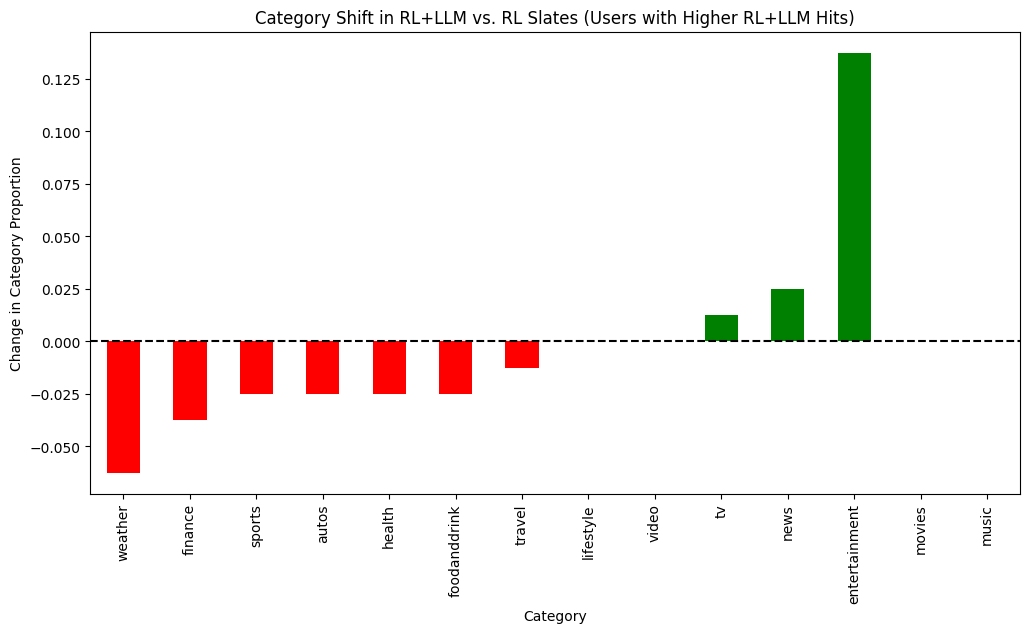

In [151]:
import matplotlib.pyplot as plt

# Sort categories by impact
category_shift_sorted = category_shift.sort_values()

plt.figure(figsize=(12, 6))
category_shift_sorted.plot(kind='bar', color=['red' if x < 0 else 'green' for x in category_shift_sorted])

plt.axhline(y=0, color='black', linestyle='--')
plt.title("Category Shift in RL+LLM vs. RL Slates (Users with Higher RL+LLM Hits)")
plt.xlabel("Category")
plt.ylabel("Change in Category Proportion")
plt.show()


In [152]:
rl_category_df['user_id'] = df_filtered['initial_user_state_tuple']
llm_category_df['user_id'] = df_filtered['initial_user_state_tuple']

In [153]:
rl_category_df = rl_category_df.groupby('user_id').mean().reset_index()
llm_category_df = llm_category_df.groupby('user_id').mean().reset_index()


In [154]:
rl_category_df

,user_id,sports,news,autos,lifestyle,weather,foodanddrink,health,video,finance,travel,entertainment,tv,movies
0,"(0.12371931970119476, 0.22699563205242157, -0....",0.25,0.1,0.0,0.10,0.1,0.2,0.1,0.05,0.05,0.05,0.00,0.0,0.0
1,"(0.15689639747142792, 0.3857199251651764, 0.00...",0.10,0.2,0.0,0.05,0.1,0.3,0.1,0.00,0.10,0.00,0.05,0.0,0.0
2,"(0.1973009705543518, 0.13024283945560455, -0.0...",0.30,0.3,0.2,0.10,0.1,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0
3,"(0.23384787142276764, 0.20115821063518524, -0....",0.40,0.3,0.1,0.10,0.0,0.0,0.0,0.00,0.00,0.10,0.00,0.0,0.0
4,"(0.2417689859867096, 0.1665371209383011, -0.01...",0.20,0.5,0.0,0.00,0.1,0.1,0.0,0.00,0.00,0.00,0.00,0.1,0.0
5,"(0.30132636427879333, 0.12159484624862671, 0.0...",0.00,0.3,0.0,0.10,0.0,0.1,0.0,0.00,0.30,0.00,0.10,0.0,0.1


In [155]:
user_category_comparison = rl_category_df.merge(llm_category_df, on='user_id', suffixes=('_rl', '_llm'))

In [156]:
user_category_comparison.columns

Index(['user_id', 'sports_rl', 'news_rl', 'autos_rl', 'lifestyle_rl',
       'weather_rl', 'foodanddrink_rl', 'health_rl', 'video_rl', 'finance_rl',
       'travel_rl', 'entertainment_rl', 'tv_rl', 'movies', 'news_llm',
       'weather_llm', 'autos_llm', 'sports_llm', 'tv_llm', 'travel_llm',
       'entertainment_llm', 'lifestyle_llm', 'music', 'health_llm',
       'video_llm', 'foodanddrink_llm', 'finance_llm'],
      dtype='object')

In [157]:
# Compute per-user category shift
category_columns = [col.replace('_rl', '').replace('_llm', '') for col in user_category_comparison.columns if '_rl' in col or '_llm' in col]
for col in category_columns:
    rl_col = f'{col}_rl'
    llm_col = f'{col}_llm'
    
    if rl_col in user_category_comparison.columns and llm_col in user_category_comparison.columns:
        user_category_comparison[f'{col}_shift'] = user_category_comparison[llm_col] - user_category_comparison[rl_col]


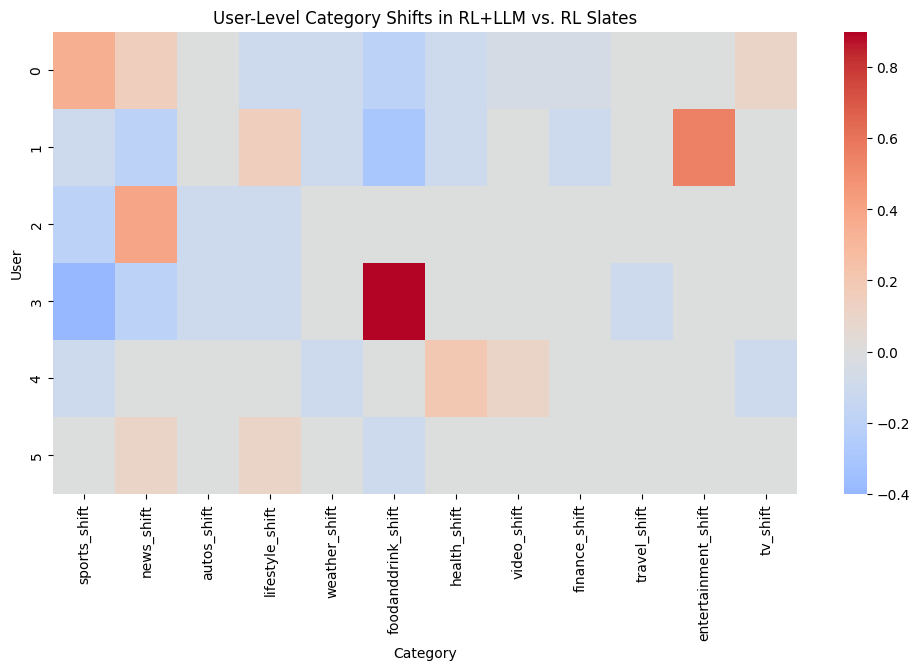

In [158]:
import seaborn as sns
# Select only category shift columns
category_shift_cols = [col for col in user_category_comparison.columns if '_shift' in col]

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(user_category_comparison[category_shift_cols], cmap='coolwarm', center=0)
plt.title("User-Level Category Shifts in RL+LLM vs. RL Slates")
plt.xlabel("Category")
plt.ylabel("User")
plt.show()

In [159]:
# Create a dictionary to map itemId to category
category_lookup = dict(zip(news_df['itemId'], news_df['category']))

# Map original clicks to categories
df_filtered['clicked_category'] = df_filtered['original_click'].map(category_lookup)

In [167]:
df_filtered['initial_user_state'] = df_filtered['initial_user_state'].apply(tuple)
merged_cat_df = rl_category_df.merge(df_filtered[['initial_user_state', 'clicked_category']],left_on='user_id', right_on='initial_user_state', how='left')
merged_cat_df = merged_cat_df.drop_duplicates(subset='user_id', keep='first').reset_index()
merged_cat_df.head()
# Create a new column 'clicked_category' in rl_category_df
rl_category_df['clicked_category'] = merged_cat_df['clicked_category_y']

In [168]:
merged_cat_df

,index,user_id,sports,news,autos,lifestyle,weather,foodanddrink,health,video,finance,travel,entertainment,tv,movies,clicked_category_x,initial_user_state,clicked_category_y
0,0,"(0.12371931970119476, 0.22699563205242157, -0....",0.25,0.1,0.0,0.10,0.1,0.2,0.1,0.05,0.05,0.05,0.00,0.0,0.0,sports,"(0.12371931970119476, 0.22699563205242157, -0....",sports
1,2,"(0.15689639747142792, 0.3857199251651764, 0.00...",0.10,0.2,0.0,0.05,0.1,0.3,0.1,0.00,0.10,0.00,0.05,0.0,0.0,sports,"(0.15689639747142792, 0.3857199251651764, 0.00...",entertainment
2,4,"(0.1973009705543518, 0.13024283945560455, -0.0...",0.30,0.3,0.2,0.10,0.1,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,entertainment,"(0.1973009705543518, 0.13024283945560455, -0.0...",news
3,5,"(0.23384787142276764, 0.20115821063518524, -0....",0.40,0.3,0.1,0.10,0.0,0.0,0.0,0.00,0.00,0.10,0.00,0.0,0.0,lifestyle,"(0.23384787142276764, 0.20115821063518524, -0....",foodanddrink
4,6,"(0.2417689859867096, 0.1665371209383011, -0.01...",0.20,0.5,0.0,0.00,0.1,0.1,0.0,0.00,0.00,0.00,0.00,0.1,0.0,news,"(0.2417689859867096, 0.1665371209383011, -0.01...",news
5,7,"(0.30132636427879333, 0.12159484624862671, 0.0...",0.00,0.3,0.0,0.10,0.0,0.1,0.0,0.00,0.30,0.00,0.10,0.0,0.1,foodanddrink,"(0.30132636427879333, 0.12159484624862671, 0.0...",news


In [169]:
rl_category_df

,user_id,sports,news,autos,lifestyle,weather,foodanddrink,health,video,finance,travel,entertainment,tv,movies,clicked_category
0,"(0.12371931970119476, 0.22699563205242157, -0....",0.25,0.1,0.0,0.10,0.1,0.2,0.1,0.05,0.05,0.05,0.00,0.0,0.0,sports
1,"(0.15689639747142792, 0.3857199251651764, 0.00...",0.10,0.2,0.0,0.05,0.1,0.3,0.1,0.00,0.10,0.00,0.05,0.0,0.0,entertainment
2,"(0.1973009705543518, 0.13024283945560455, -0.0...",0.30,0.3,0.2,0.10,0.1,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,news
3,"(0.23384787142276764, 0.20115821063518524, -0....",0.40,0.3,0.1,0.10,0.0,0.0,0.0,0.00,0.00,0.10,0.00,0.0,0.0,foodanddrink
4,"(0.2417689859867096, 0.1665371209383011, -0.01...",0.20,0.5,0.0,0.00,0.1,0.1,0.0,0.00,0.00,0.00,0.00,0.1,0.0,news
5,"(0.30132636427879333, 0.12159484624862671, 0.0...",0.00,0.3,0.0,0.10,0.0,0.1,0.0,0.00,0.30,0.00,0.10,0.0,0.1,news


In [170]:
user_category_comparison

,user_id,sports_rl,news_rl,autos_rl,lifestyle_rl,weather_rl,foodanddrink_rl,health_rl,video_rl,finance_rl,...,autos_shift,lifestyle_shift,weather_shift,foodanddrink_shift,health_shift,video_shift,finance_shift,travel_shift,entertainment_shift,tv_shift
0,"(0.12371931970119476, 0.22699563205242157, -0....",0.25,0.1,0.0,0.10,0.1,0.2,0.1,0.05,0.05,...,0.0,-0.10,-0.1,-0.2,-0.1,-0.05,-0.05,0.0,0.00,0.1
1,"(0.15689639747142792, 0.3857199251651764, 0.00...",0.10,0.2,0.0,0.05,0.1,0.3,0.1,0.00,0.10,...,0.0,0.15,-0.1,-0.3,-0.1,0.00,-0.10,0.0,0.55,0.0
2,"(0.1973009705543518, 0.13024283945560455, -0.0...",0.30,0.3,0.2,0.10,0.1,0.0,0.0,0.00,0.00,...,-0.1,-0.10,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0
3,"(0.23384787142276764, 0.20115821063518524, -0....",0.40,0.3,0.1,0.10,0.0,0.0,0.0,0.00,0.00,...,-0.1,-0.10,0.0,0.9,0.0,0.00,0.00,-0.1,0.00,0.0
4,"(0.2417689859867096, 0.1665371209383011, -0.01...",0.20,0.5,0.0,0.00,0.1,0.1,0.0,0.00,0.00,...,0.0,0.00,-0.1,0.0,0.2,0.10,0.00,0.0,0.00,-0.1
5,"(0.30132636427879333, 0.12159484624862671, 0.0...",0.00,0.3,0.0,0.10,0.0,0.1,0.0,0.00,0.30,...,0.0,0.10,0.0,-0.1,0.0,0.00,0.00,0.0,0.00,0.0


/tmp/ipykernel_2035894/1573016766.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()
/tmp/ipykernel_2035894/1573016766.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()
/tmp/ipykernel_2035894/1573016766.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()
/tmp/ipykernel_2035894/1573016766.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()
/tmp/ipykernel_2035894/1573016766.py:37: UserWarning: No artists with labels fou

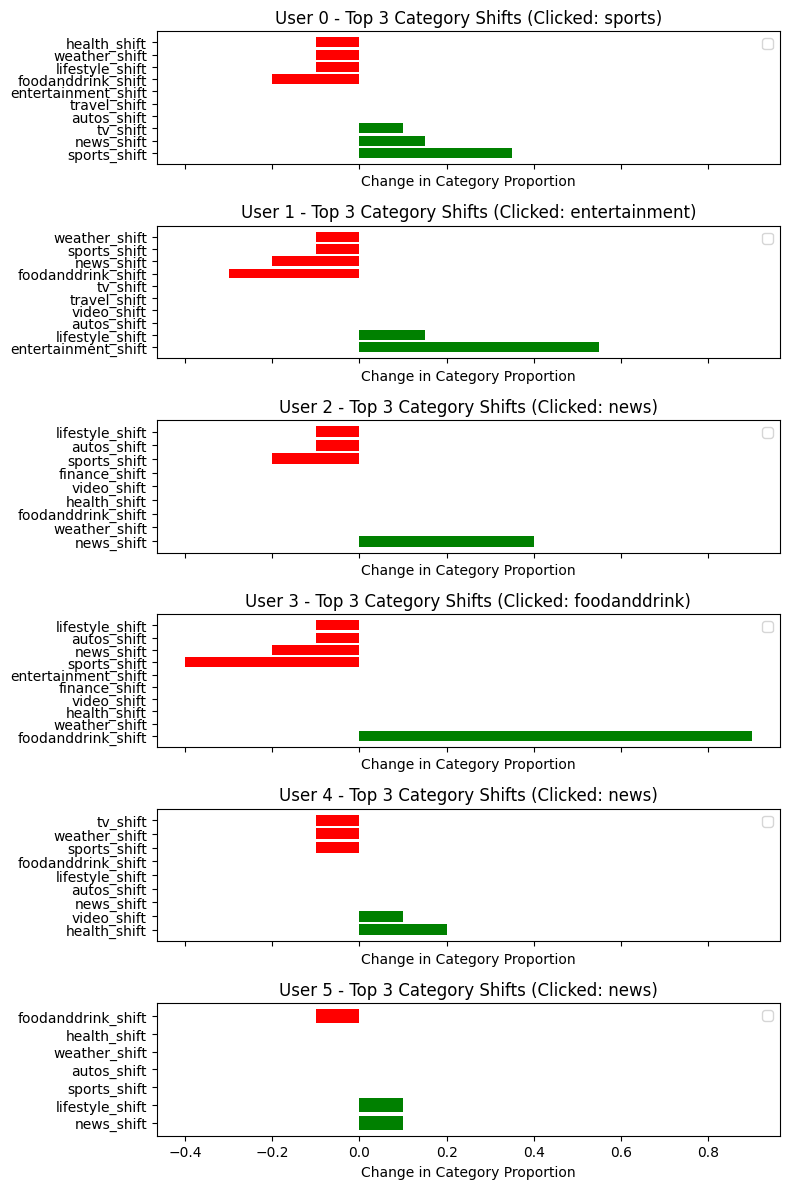

In [171]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Convert DataFrame to dictionary mapping users to their top increased/decreased categories
top_categories_per_user = user_category_comparison[category_shift_cols].apply(
    lambda x: {
        "top_increased": x.nlargest(6).index.tolist(),
        "top_decreased": x.nsmallest(4).index.tolist()
    }, axis=1
)

# Reset index to ensure users are numbered 0,1,2...
user_category_comparison = user_category_comparison.reset_index(drop=True)
df_filtered = df_filtered.reset_index(drop=True)

# Visualize top category changes for a subset of users
num_users_to_plot = len(user_category_comparison) # Adjust for more/less users
fig, axes = plt.subplots(num_users_to_plot, 1, figsize=(8, 2 * num_users_to_plot), sharex=True)

for i in range(num_users_to_plot):
    user_data = top_categories_per_user.iloc[i]
    categories = user_data["top_increased"] + user_data["top_decreased"]
    shifts = user_category_comparison.loc[i, [f"{c}" for c in categories]]

    colors = ['green' if c in user_data["top_increased"] else 'red' for c in categories]

    axes[i].barh(categories, shifts, color=colors)
    
    # Get the clicked category for this user
    clicked_category = rl_category_df.loc[i, "clicked_category"]
    if clicked_category in categories:
        axes[i].axhline(y=categories.index(clicked_category), color='blue', linestyle='--', label="Clicked Category")

    axes[i].set_title(f"User {i} - Top 3 Category Shifts (Clicked: {clicked_category})")
    axes[i].set_xlabel("Change in Category Proportion")
    axes[i].legend()

plt.tight_layout()
plt.show()


In [155]:
df_filtered

,initial_user_state,candidate_docs,slate_docs,slate_docs_feature,llm_slate,original_click,hit,initial_user_state_tuple,rl_slates,rl_hit,slate_reranked,reranked_hit,rl_categories,llm_categories,clicked_category
0,"[0.1973009705543518, 0.13024283945560455, -0.0...","[[-0.04699699580669403, -0.1554999053478241, 0...","[7, 50, 38, 25, 34, 56, 47, 8, 54, 51]","[[0.16044361889362335, 0.02018088661134243, -0...","[N94421, N114252, N43628, N108178, N89473, N97...",N94421,1,"(0.1973009705543518, 0.13024283945560455, -0.0...","[N130175, N97980, N18469, N9712, N130369, N635...",0,"[N130175, N130369, N97980, N130175, N9712, N10...",0,"{'sports': 0.3, 'news': 0.3, 'autos': 0.2, 'li...","{'news': 0.7, 'weather': 0.1, 'autos': 0.1, 's...",news
1,"[0.12371931970119476, 0.22699563205242157, -0....","[[0.12557996809482574, 0.09453339874744415, -0...","[35, 53, 57, 3, 17, 29, 48, 20, 49, 55]","[[0.06847824156284332, 0.1842382550239563, -0....","[N123784, N71497, N110473, N66619, N112602, N2...",N123784,1,"(0.12371931970119476, 0.22699563205242157, -0....","[N79900, N1507, N79917, N4971, N36564, N113273...",0,"[N58449, N79917, N4971, N96282, N36564, N11327...",0,"{'sports': 0.3, 'foodanddrink': 0.2, 'weather'...","{'sports': 0.6, 'tv': 0.2, 'news': 0.2}",sports
2,"[0.12371931970119476, 0.22699563205242157, -0....","[[0.12557996809482574, 0.09453339874744415, -0...","[35, 53, 3, 57, 43, 7, 48, 29, 17, 49]","[[0.06847824156284332, 0.1842382550239563, -0....","[N123784, N71497, N110473, N66619, N127156, N3...",N71497,1,"(0.12371931970119476, 0.22699563205242157, -0....","[N79900, N1507, N4971, N79917, N46171, N82667,...",0,"[N113273, N1507, N36564, N82667, N79917, N4617...",0,"{'foodanddrink': 0.2, 'sports': 0.2, 'weather'...","{'sports': 0.6, 'news': 0.3, 'travel': 0.1}",sports
3,"[0.15689639747142792, 0.3857199251651764, 0.00...","[[0.21243348717689514, 0.21300996840000153, -0...","[5, 0, 6, 17, 16, 59, 28, 53, 14, 30]","[[0.31355252861976624, 0.08622187376022339, 0....","[N13761, N71593, N59935, N19455, N36306, N4841...",N36306,1,"(0.15689639747142792, 0.3857199251651764, 0.00...","[N44060, N98830, N101347, N71394, N50466, N129...",0,"[N12724, N33378, N44060, N71394, N101347, N169...",0,"{'foodanddrink': 0.3, 'news': 0.2, 'health': 0...","{'entertainment': 0.6, 'lifestyle': 0.2, 'musi...",entertainment
4,"[0.15689639747142792, 0.3857199251651764, 0.00...","[[0.21243348717689514, 0.21300996840000153, -0...","[59, 0, 6, 5, 24, 17, 53, 30, 14, 16]","[[0.3562326729297638, 0.2922508418560028, -0.1...","[N19455, N13761, N59935, N71593, N36306, N4841...",N59935,1,"(0.15689639747142792, 0.3857199251651764, 0.00...","[N129097, N98830, N101347, N44060, N34379, N71...",0,"[N16975, N129097, N34379, N44060, N50466, N713...",0,"{'foodanddrink': 0.3, 'news': 0.2, 'weather': ...","{'entertainment': 0.6, 'lifestyle': 0.2, 'musi...",lifestyle
5,"[0.2417689859867096, 0.1665371209383011, -0.01...","[[0.4277783930301666, 0.005571569781750441, 0....","[25, 14, 6, 24, 0, 45, 44, 33, 19, 13]","[[0.0839754268527031, 0.2669224143028259, 0.27...","[N31544, N26259, N57258, N127852, N100085, N11...",N112050,1,"(0.2417689859867096, 0.1665371209383011, -0.01...","[N80021, N89056, N126664, N125734, N28917, N12...",0,"[N74709, N89056, N126664, N125734, N89056, N79...",0,"{'news': 0.5, 'sports': 0.2, 'weather': 0.1, '...","{'news': 0.5, 'health': 0.2, 'video': 0.1, 'fo...",news
6,"[0.30132636427879333, 0.12159484624862671, 0.0...","[[0.3035144507884979, 0.04950062930583954, 0.0...","[30, 43, 17, 18, 49, 59, 4, 10, 34, 52]","[[0.22265242040157318, -0.023396611213684082, ...","[N100804, N57319, N116118, N71394, N126592, N1...",N57319,1,"(0.30132636427879333, 0.12159484624862671, 0.0...","[N100804, N68483, N116118, N71394, N121958, N1...",0,"[N113130, N68483, N116118, N19805, N59301, N10...",0,"{'news': 0.3, 'finance': 0.3, 'foodanddrink': ...","{'news': 0.4, 'finance': 0.3, 'lifestyle': 0.2...",news
7,"[0.23384787142276764, 0.20115821063518524, -0....","[[0.3703044354915619, 0.2459